# Used Car Price Prediction Project

In [30]:
import pandas as pd
import numpy as np
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [31]:
car_df=pd.read_csv('cars.csv')
car_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [32]:
# drop car id

car_df.drop('Car_ID', axis=1, inplace=True)
car_df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [33]:
# Check null values

car_df.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [34]:
# check shape print columns and rows
# Print columns and rows numbers
print(f"Columns: {len(car_df.columns)}, Rows: {car_df.shape[0]}")


Columns: 12, Rows: 100


In [35]:
# check unique values from brand column
car_df['Brand'].unique()


array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [36]:
# sum unique values
car_df['Brand'].nunique()

11

In [37]:
# covert all brand into int create new df with brand and convert brand in to int one-hot encoded columns.
brand_df = pd.get_dummies(car_df['Brand']).astype(int)
brand_df.head()


,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [38]:
# check unique models 
car_df['Model'].unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [39]:
# check sum unique models
car_df['Model'].nunique()

58

In [40]:
# covert all model into int create new df with model and convert model in to int one-hot encoded columns.
model_df = pd.get_dummies(car_df['Model']).astype(int)
model_df.head()

,3 Series,5 Series,7 Series,A3,A4,A5,A6,Altroz,Ameo,Aspire,...,Vento,Venue,Verna,Vitara,WR-V,X1,X3,X5,XUV300,Yaris
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# check fuel type column
car_df['Fuel_Type'].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [42]:
# no need of of one hot encoding insted use replace 0 and 1 function

car_df['Fuel_Type'] = car_df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1})
car_df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,0,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,0,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,0,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,1,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,1,Automatic,Second,18,1999,194,5,850000


In [43]:
# check unique values of transmission
car_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [44]:
# use same replace method 
car_df['Transmission'] = car_df['Transmission'].replace({'Manual': 0, 'Automatic': 1})

car_df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,0,0,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,0,1,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,0,1,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,1,0,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,1,1,Second,18,1999,194,5,850000


In [45]:
# check unique values for owner_type
car_df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [46]:
# use same replace method  in to numeric
car_df['Owner_Type'] = car_df['Owner_Type'].replace({'First': 1, 'Second': 2, 'Third': 3})
car_df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,0,0,1,15,1498,108,5,800000
1,Honda,Civic,2019,40000,0,1,2,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,0,1,1,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,1,0,3,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,1,1,2,18,1999,194,5,850000


In [47]:
# now drop unwanteed column brand and model
car_df.drop(['Brand', 'Model'], axis=1, inplace=True)

car_df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2018,50000,0,0,1,15,1498,108,5,800000
1,2019,40000,0,1,2,17,1597,140,5,1000000
2,2017,20000,0,1,1,10,4951,395,4,2500000
3,2020,30000,1,0,3,23,1248,74,5,600000
4,2016,60000,1,1,2,18,1999,194,5,850000


In [48]:
# now concatenate with car_df and brand_df and model_df
df = pd.concat([car_df, brand_df, model_df], axis=1)
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Vento,Venue,Verna,Vitara,WR-V,X1,X3,X5,XUV300,Yaris
0,2018,50000,0,0,1,15,1498,108,5,800000,...,0,0,0,0,0,0,0,0,0,0
1,2019,40000,0,1,2,17,1597,140,5,1000000,...,0,0,0,0,0,0,0,0,0,0
2,2017,20000,0,1,1,10,4951,395,4,2500000,...,0,0,0,0,0,0,0,0,0,0
3,2020,30000,1,0,3,23,1248,74,5,600000,...,0,0,0,0,0,0,0,0,0,0
4,2016,60000,1,1,2,18,1999,194,5,850000,...,0,0,0,0,0,0,0,0,0,0


# we have all data in numerical way now we will divide into input and other features for calculation

In [51]:
# drop price column and assign to X so technicall price is dependent variable we need to calculate price
X = df.drop('Price', axis=1)
y= df['Price']
X.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,...,Vento,Venue,Verna,Vitara,WR-V,X1,X3,X5,XUV300,Yaris
0,2018,50000,0,0,1,15,1498,108,5,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,40000,0,1,2,17,1597,140,5,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,20000,0,1,1,10,4951,395,4,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,30000,1,0,3,23,1248,74,5,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,60000,1,1,2,18,1999,194,5,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X = df.drop('Price', axis=1)
y= df['Price']
# see prices in series data structure
y.head()



0     800000
1    1000000
2    2500000
3     600000
4     850000
Name: Price, dtype: int64

# we have divided dataset in to input features and target features now data normalization on input features because see below every column has different feature numbers

In [56]:
X.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,...,Vento,Venue,Verna,Vitara,WR-V,X1,X3,X5,XUV300,Yaris
count,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000
mean,2018.39000,28150.000000,0.480000,0.57000,1.690000,17.210000,1855.230000,158.130000,5.230000,0.100000,...,0.020000,0.020000,0.030000,0.020000,0.020000,0.01,0.020000,0.020000,0.020000,0.020000
std,1.17116,9121.375716,0.502117,0.49757,0.691872,3.309902,631.311475,76.968137,0.750151,0.301511,...,0.140705,0.140705,0.171447,0.140705,0.140705,0.10,0.140705,0.140705,0.140705,0.140705
min,2016.00000,10000.000000,0.000000,0.00000,1.000000,10.000000,999.000000,68.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
25%,2017.75000,22000.000000,0.000000,0.00000,1.000000,15.000000,1462.000000,103.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
50%,2018.00000,27000.000000,0.000000,1.00000,2.000000,17.000000,1774.000000,148.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
75%,2019.00000,32000.000000,1.000000,1.00000,2.000000,19.000000,2143.000000,187.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
max,2021.00000,60000.000000,1.000000,1.00000,3.000000,25.000000,4951.000000,396.000000,7.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000


In [60]:
# use min max scaling import it and create object
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

X.head()



,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,...,Vento,Venue,Verna,Vitara,WR-V,X1,X3,X5,XUV300,Yaris
0,0.4,0.8,0,0,0.0,0.333333,0.126265,0.121951,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
1,0.6,0.6,0,1,0.5,0.466667,0.151316,0.219512,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
2,0.2,0.2,0,1,0.0,0.000000,1.000000,0.996951,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
3,0.8,0.4,1,0,1.0,0.866667,0.063006,0.018293,0.333333,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,1,1,0.5,0.533333,0.253036,0.384146,0.333333,0,...,0,0,0,0,0,0,0,0,0,0


# now everything is in scale 0 to 1

# PCA is used to reduce dimensionality, remove redundancy by transforming correlated features into uncorrelated components, improve computational efficiency, handle noise by focusing on components with maximum variance, and enable visualization and feature engineering, especially in high-dimensional datasets.

In [ ]:
# use 95% of imp data with pca 
from sklearn.decomposition import PCA

pca = PCA(0.95)

X_pca = pca.fit_transform(X)

X_pca.shape
X_pca[:1]
# what this means




array([[-5.43179262e-01,  1.01383629e-01, -2.08743433e-01,
         6.67419095e-01, -5.11979646e-01,  4.32789027e-01,
        -2.85255057e-01,  2.31612141e-01, -7.91997446e-03,
         2.59754578e-02, -4.30354306e-01,  5.72654924e-03,
         1.37440509e-01, -3.33848332e-01, -3.53565930e-02,
         2.94281955e-01, -2.05015478e-01, -4.22372475e-02,
        -5.32905703e-02, -9.87769976e-02,  1.04285219e-01,
        -1.05460803e-01,  3.11129618e-02,  5.27791788e-17,
        -3.39606359e-16, -3.25058204e-16,  2.13087593e-16,
         1.13877504e-16,  3.43413366e-16,  4.04581096e-16,
        -3.54314001e-16, -1.23397384e-17,  1.13592969e-16,
        -6.99398086e-17, -4.51620209e-16, -4.03604695e-16,
         2.45571643e-16, -2.91050678e-01,  4.64087740e-02,
         3.26372821e-01, -3.90217730e-01,  1.58881918e-01,
         5.07877431e-02,  2.48415402e-01, -2.32016348e-02]])

In [67]:
# check number of columns
num=X_pca.shape[1]

In [ ]:
# now create columns using pca and range giving names
X_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(num)])
X_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-0.543179,0.101384,-0.208743,0.667419,-0.511980,0.432789,-0.285255,0.231612,-0.007920,0.025975,...,-4.036047e-16,2.455716e-16,-0.291051,0.046409,0.326373,-0.390218,0.158882,0.050788,0.248415,-0.023202
1,0.011585,-0.398709,0.010311,-0.121415,-0.159238,0.008236,0.073802,-0.007627,-0.219433,0.756687,...,6.532903e-17,-1.637901e-17,-0.312042,-0.459889,0.129266,0.102313,0.278335,-0.398757,-0.068637,-0.051460
2,0.534647,-0.807081,-0.442167,0.970720,0.602607,-0.467688,0.143016,-0.152883,0.352310,-0.004168,...,1.996087e-16,1.285944e-16,0.073765,-0.024815,-0.028928,0.018209,0.023616,0.053362,0.030409,-0.031785
3,-0.635897,0.424994,0.479715,-0.312667,0.305844,0.161418,0.113400,0.049458,-0.625031,-0.147415,...,2.241788e-16,5.618129e-16,0.232283,0.020311,0.570097,0.392930,0.072187,-0.025127,0.021785,0.310237
4,0.494339,0.179990,0.899090,-0.229086,-0.234439,-0.397414,-0.390740,-0.118095,0.433765,0.014644,...,-2.145578e-16,-6.310089e-17,-0.248056,-0.074434,0.330999,0.068185,-0.273849,0.411194,-0.178022,-0.004019


In [69]:
# now create train test import first 
from sklearn.model_selection import train_test_split
# split dataset into features and target variable
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80, 45), (20, 45), (80,), (20,))

In [70]:
# now create linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [72]:
# check first few label for testing y_test: This is the true target values (labels) for the test set,  used to evaluate the model's predictions.# 
# [:5]: This slice operation selects the first 5 entries from y_test.
y_test[:5]

83    1600000
53     700000
70    1300000
45    1600000
44     850000
Name: Price, dtype: int64

In [73]:
# store predicted value to pred
pred = model.predict(X_test)

In [74]:
pred[:5]

array([ 621889.86876286,  684473.24443016, 1305294.60374719,
        621889.86876286,  891977.41117435])

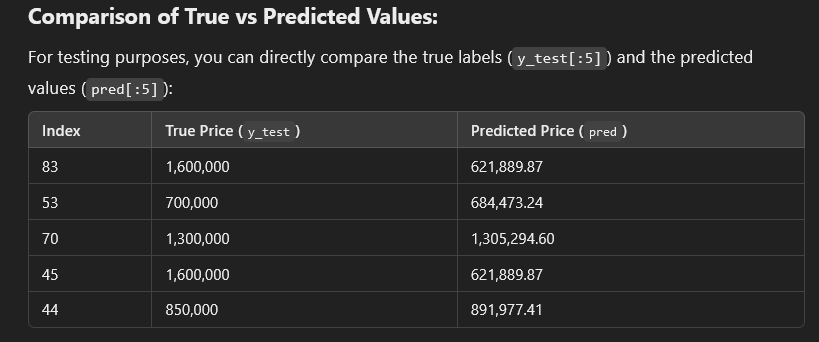

Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values, with lower values indicating better model performance.

R-squared (R²): Represents the proportion of variance in the target variable explained by the model, with values closer to 1 indicating a better fit.

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values, with lower values indicating better prediction accuracy.

In [89]:
# use all evaluation metrics import first and use it
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, pred)

r2 = r2_score(y_test, pred)

mae = mean_absolute_error(y_test, pred)
# print all metrics
print(f'Mean Squared Error: {mse}')

print(f'R-squared: {r2}')

print(f'Mean Absolute Error: {mae}')



Mean Squared Error: 55087042179.228775
R-squared: 0.9326440763230069
Mean Absolute Error: 165422.35195616874


np.float64(234706.2891769813)

# Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression technique with L1 regularization that adds a penalty to the loss function, driving some coefficients to zero for feature selection. It helps prevent overfitting by simplifying the model. The alpha parameter controls regularization strength, max_iter sets the maximum iterations for convergence, and tol specifies the tolerance for optimization stopping.

In [87]:
# use lasso regression algorithm
from sklearn.linear_model import Lasso

# create lasso regression object
lasso_model = Lasso(alpha=50,max_iter=100,tol=0.1)

# fit the model
lasso_model.fit(X_train, y_train)

# store predicted value to pred

Lasso(alpha=50, max_iter=100, tol=0.1)

In [78]:
# evaluate the model
pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, pred)

r2 = r2_score(y_test, pred)

mae = mean_absolute_error(y_test, pred)

# print all metrics
print(f'Mean Squared Error: {mse}')

print(f'R-squared: {r2}')

print(f'Mean Absolute Error: {mae}')
np.sqrt(mse)

Mean Squared Error: 55087042179.228775
R-squared: 0.9326440763230069
Mean Absolute Error: 165422.35195616874


np.float64(234706.2891769813)

# Ridge Regression is a linear regression technique with L2 regularization, which adds a penalty proportional to the square of the coefficients to prevent overfitting. It shrinks coefficients without setting them to zero, unlike Lasso. The alpha parameter controls the regularization strength.

In [82]:
# ridge regression
from sklearn.linear_model import Ridge

# create ridge regression object
ridge_model = Ridge(alpha=50,max_iter=100,tol=0.1)

# fit the model
ridge_model.fit(X_train, y_train)



Ridge(alpha=50, max_iter=100, tol=0.1)

In [84]:
# store predicted value to pred
pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, pred)

r2 = r2_score(y_test, pred)

mae = mean_absolute_error(y_test, pred)

# print all metrics
print(f'Mean Squared Error: {mse}')

print(f'R-squared: {r2}')

print(f'Mean Absolute Error: {mae}')

# usi sqrt of mean sq error
np.sqrt(mse)



Mean Squared Error: 593015736512.3003
R-squared: 0.27490892399303013
Mean Absolute Error: 659708.5932111902


np.float64(770075.1499122019)

# lasso regression is good it reduce mse 

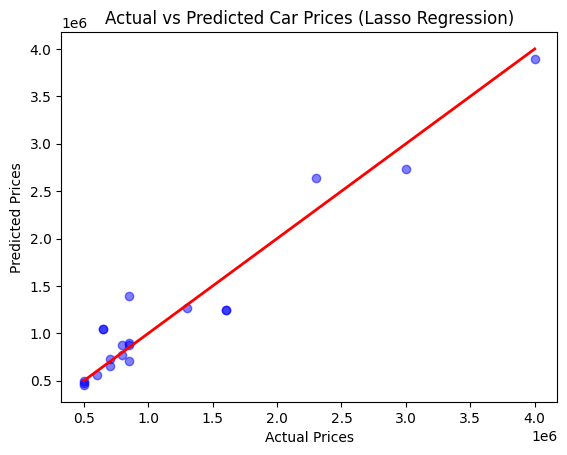

In [90]:
import matplotlib.pyplot as plt

# Predicted vs Actual values
plt.scatter(y_test, pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of equality
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices (Lasso Regression)')
plt.show()


In [108]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the dataset
data = pd.read_csv('cars.csv')  # Correct way to load a CSV file

# Step 2: Convert categorical variables to numeric using get_dummies (One-hot encoding)
df = pd.get_dummies(data, drop_first=True)  # drop_first to avoid multicollinearity

# Step 3: Split the data into features (X) and target (y)
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target (Price)

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the features using StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Step 6: Scale the target variable (Price) using MinMaxScaler
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Step 7: Train the Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train_scaled)

# Step 8: Predict the prices on the test data
pred_scaled = lasso_model.predict(X_test_scaled)

# Step 9: Inverse the scaling to get the original price values
pred_original = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1))

# Step 10: Format the predictions to INR (₹)
formatted_predictions_inr = [f"₹{x[0]:,.2f}" for x in pred_original]

# Step 11: Display the predictions for the client
print("Predicted Car Price:")
for i, price in enumerate(formatted_predictions_inr[:5]):  # Show first 5 predictions
    print(f"Car {i+1}: {price}")

# Step 12: Model Evaluation (Optional)
mae = mean_absolute_error(y_test, pred_original)
mse = mean_squared_error(y_test, pred_original)
r2 = r2_score(y_test, pred_original)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Mean Squared Error (MSE): ₹{mse:,.2f}")
print(f"R-squared: {r2:.3f}")


Predicted Car Price:
Car 1: ₹1,659,800.26
Car 2: ₹1,290,136.81
Car 3: ₹1,482,512.65
Car 4: ₹1,659,800.26
Car 5: ₹1,196,697.12

Model Evaluation:
Mean Absolute Error (MAE): ₹577,454.90
Mean Squared Error (MSE): ₹421,115,997,280.91
R-squared: 0.485
